In [416]:
from math import pi, sin, cos, sqrt, pow, radians, degrees, hypot
import matplotlib.pyplot as plt
import numpy as np

Fig1u.re Q3(b) shows a shaft loaded with pulleys C and D, supported by bearings A and
B. The shaft transmits 70 kW of power at 1500 rpm to both pulleys. The diameters of
pulleys C and Dare 150 mm and 100 mm, respectively. Meanwhile, the belt tension
ratfos for pulley C and D are 2:1 and 3:2, respectively. The high-strength steel with a
yield stress of Sy::; 345 MPa is used for the shafl, with a safety factor of 2.5

i) Determ ine the belt tension on pulley C and D.

ii) Determ ine the diameter of using maximum shear stress theory of failure.

iii) If the material of the shaft changes to 600 MPa of the yield stress, suggest the
new diameter of the shaft.

![Q3](figs/t5-q3-1.png)

In [417]:
Power = 70000
nA = 1500
rC=0.075
rD = 0.05
Sy=345E+6
FOS=2.5

$$P=\frac{2\pi n}{60} T$$

In [418]:
TorqueC = round(Power*60/(2*pi*nA),2)
print(f'Torque = {TorqueC} Nm')

Torque = 445.63 Nm


$$T=(F_1-F_2)r$$
$$F_1=2F_2$$
$$T=(2F_2-F_2)r$$
$$T=(F_2)r$$

In [419]:
F2=round(TorqueC/rC,2)
print(f'F2 = {F2} N')
F1=2*F2
print(f'F1 = {F1} N')

F2 = 5941.73 N
F1 = 11883.46 N


$$T=(F_3-F_4)r$$
$$F_3=\frac{3}{2}F_4$$
$$T=(1.5F4-F_4)r$$
$$T=(0.5F4)r$$

In [420]:
F4=round(TorqueC/(rD*0.5),2)
print(f'F4 = {F4} N')
F3=round(1.5*F4,2)
print(f'F3 = {F3} N')

F4 = 17825.2 N
F3 = 26737.8 N


In [421]:
Fc=F1+F2
Fd=F3+F4
print(f'Fc = {Fc} N')
print(f'Fd = {Fd} N')

Fc = 17825.19 N
Fd = 44563.0 N


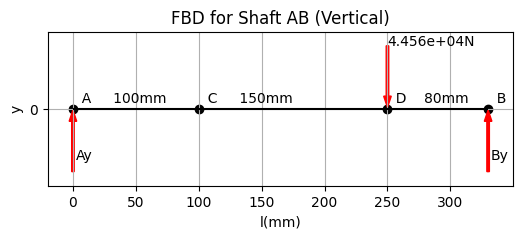

In [422]:
# Vertical Loading

coorA = [0,0]
coorB = [330,0]
coorC = [100,0]
coorD = [250,0]
loadLocation = [250,0]

data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T

fig, ax = plt.subplots()
fig.set_size_inches(6,2)
ax.grid()
ax.set_yticks([0])
ax.scatter(x,y, color='k')

ax.arrow(coorA[0],coorA[1]-50, 0,40,width=2,color='r')
ax.arrow(coorB[0],coorB[1]-50, 0,40,width=2,color='r')
ax.arrow(loadLocation[0],loadLocation[1]+50, 0,-40,width=2,color='r')
ax.hlines(0,0,330, colors='k')

ax.set(xlabel='l(mm)', ylabel='y',
       title='FBD for Shaft AB (Vertical)')

ax.text(loadLocation[0],loadLocation[1]+50,f'{Fd:.3e}N')
ax.text(coorA[0]+2,coorA[1]-40,f'Ay')
ax.text(coorB[0]+2,coorB[1]-40,f'By')
ax.text(coorA[0],coorA[1]+5,f'  A     100mm')
ax.text(coorB[0],coorB[1]+5,f'  B')
ax.text(coorC[0],coorC[1]+5,f'  C     150mm')
ax.text(coorD[0],coorD[1]+5,f'  D    80mm')

plt.axis('equal')
plt.show()

Calculate reaction force at A and B

$$+\uparrow \sum F_x=0$$
$$A_y+B_x-22281.5=0$$

$$+\circlearrowleft \sum M_b=0$$
$$-A_y(330)+22281.5(80)=0$$
$$A_y=22281.5(80)/330$$

In [423]:
ab = 330
db = 80
Ay=round(Fd*db/ab,2)
print(f'Ay = {Ay} N')

Ay = 10803.15 N


In [424]:
By = Fd-Ay
print(f'By = {By} N')

By = 33759.85 N


In [425]:
Cy=Fd

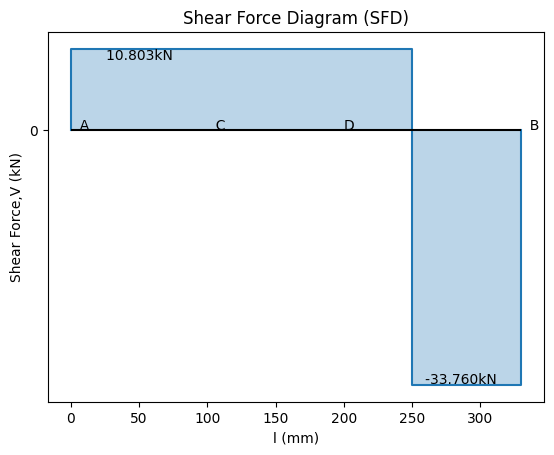

In [426]:
# SFD

ab = 330
ad = 250

y=[0,0,ad,ad,ab,ab]
Vy=[0,Ay,Ay,Ay-Fd,Ay-Fd,0]

fig, ax1 = plt.subplots()
ax1.set_yticks([0])
ax1.plot(y,Vy)
ax1.hlines(0,0,ab,colors='black')
ax1.fill_between(y, Vy, alpha=0.3) # Added fill_between
ax1.set_title('Shear Force Diagram (SFD)')
ax1.set_xlabel('l (mm)')
ax1.set_ylabel('Shear Force,V (kN)')

ax1.text(coorA[0],coorA[1]+100,f'  A')
ax1.text(coorB[0],coorB[1]+100,f'  B')
ax1.text(coorC[0],coorC[1]+100,f'  C')
ax1.text(coorD[0]-50,coorD[1]+100,f'D')

ax1.text(coorA[0],Vy[1]-1500,f'        {Vy[1]/1000:.3f}kN')
ax1.text(coorD[0],Vy[3]+100,f'   {Vy[3]/1000:.3f}kN')

plt.show()

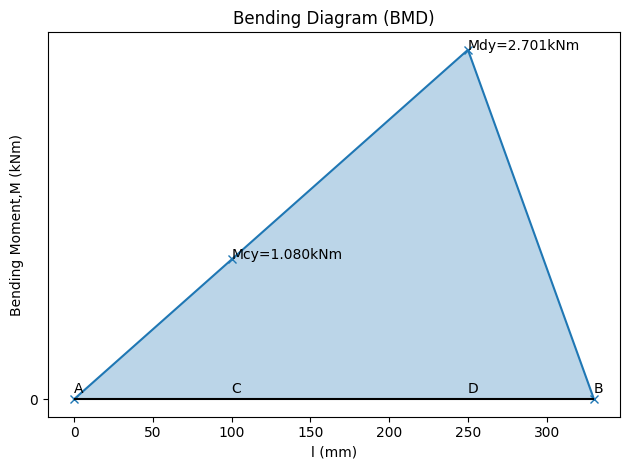

In [427]:
# BMD
ac=100
y=[0,ac,ad,ab]
Mcy=Ay*ac/1000
Mdy=Ay*ad/1000
My=[0,Mcy,Mdy,0]

fig, ax2 = plt.subplots()
ax2.set_yticks([0])
ax2.plot(y, My,marker='x')
ax2.hlines(0,0,ab,colors='black')
ax2.fill_between(y, My, alpha=0.3) # Added fill_between
ax2.set_title('Bending Diagram (BMD)')
ax2.set_xlabel('l (mm)')
ax2.set_ylabel('Bending Moment,M (kNm)')
ax2.text(coorA[0],coorA[1]+50,f'A')
ax2.text(coorB[0],coorB[1]+50,f'B')
ax2.text(coorC[0],coorC[1]+50,f'C')
ax2.text(coorD[0],coorD[1]+50,f'D')
ax2.text(coorC[0],My[1],f'Mcy={My[1]/1000:.3f}kNm')
ax2.text(coorD[0],My[2],f'Mdy={My[2]/1000:.3f}kNm')
plt.tight_layout()
plt.show()

Horizontal loading

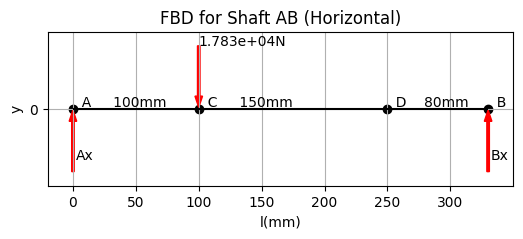

In [428]:
# Horizontal Loading

coorA = [0,0]
coorB = [330,0]
coorC = [100,0]
coorD = [250,0]
loadLocation = [100,0]

data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T

fig, ax = plt.subplots()
fig.set_size_inches(6,2)
ax.grid()
ax.set_yticks([0])
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+50, 0,-40,width=2,color='r')
ax.arrow(coorA[0],coorA[1]-50,0,40,width=2,color='r')
ax.arrow(coorB[0],coorB[1]-50, 0,40 ,width=2,color='r')
ax.hlines(0,0,330, colors='k')

ax.set(xlabel='l(mm)', ylabel='y',
       title='FBD for Shaft AB (Horizontal)')

ax.text(loadLocation[0],loadLocation[1]+50,f'{Fc:.3e}N')
ax.text(coorA[0]+2,coorA[1]-40,f'Ax')
ax.text(coorB[0]+2,coorB[1]-40,f'Bx')
ax.text(coorA[0],coorA[1]+2,f'  A     100mm')
ax.text(coorB[0],coorB[1]+2,f'  B')
ax.text(coorC[0],coorC[1]+2,f'  C     150mm')
ax.text(coorD[0],coorD[1]+2,f'  D    80mm')

plt.axis('equal')
plt.show()

$$+\uparrow \sum F_y=0$$
$$A_y+B_y-17825.19=0$$

$$+\circlearrowleft \sum M_b=0$$
$$-A_y(330)+17825.19(230)=0$$
$$A_y=17825.19(230)/330$$

In [429]:
ab = 330
cb = 230
Ax=round(Fc*cb/ab,2)
print(f'Ax = {Ax} N')

Ax = 12423.62 N


In [430]:
Bx = round(Fc-Ax,2)
print(f'Bx = {Bx} N')

Bx = 5401.57 N


In [431]:
Cx = Fc

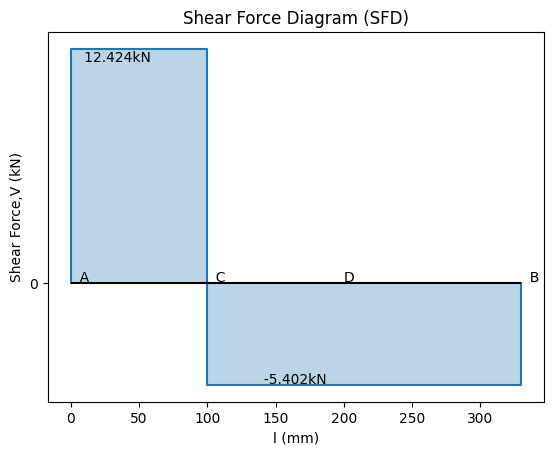

In [432]:
# SFD

ac=100
ab = 330

x=[0,0,ac,ac,ab,ab]
Vx=[0,Ax,Ax,Ax-Fc,Ax-Fc,0]

fig, ax1 = plt.subplots()
ax1.set_yticks([0])
ax1.plot(x,Vx)
ax1.hlines(0,0,ab,colors='black')
ax1.fill_between(x, Vx, alpha=0.3) # Added fill_between
ax1.set_title('Shear Force Diagram (SFD)')
ax1.set_xlabel('l (mm)')
ax1.set_ylabel('Shear Force,V (kN)')

ax1.text(coorA[0],coorA[1]+50,f'  A')
ax1.text(coorB[0],coorB[1]+50,f'  B')
ax1.text(coorC[0],coorC[1]+50,f'  C')
ax1.text(coorD[0]-50,coorD[1]+50,f'D')

ax1.text(coorA[0],Vx[1]-700,f'   {Vx[1]/1000:.3f}kN')
ax1.text(coorC[0],Vx[3]+50,f'             {Vx[3]/1000:.3f}kN')

plt.show()

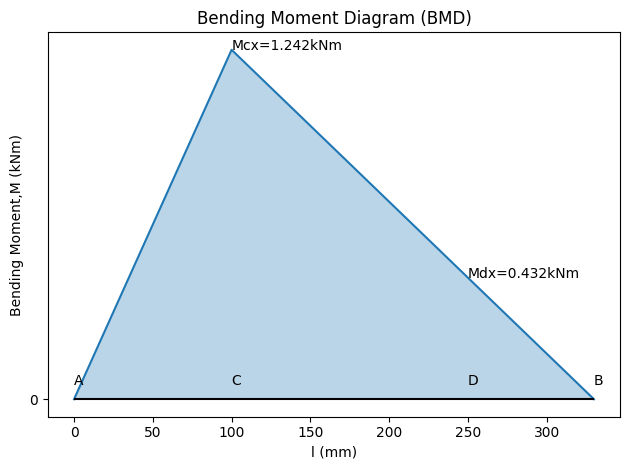

In [439]:
cd=150
x=[0,ac,ad,ab]
Mcx=Ax*ac/1000
Mdx=Ax*ac/1000-(Bx*cd/1000)
Mx=[0,Mcx,Mdx,0]

fig, ax2 = plt.subplots()
ax2.set_yticks([0])
ax2.plot(x, Mx)
ax2.hlines(0,0,ab,colors='black')
ax2.fill_between(x, Mx, alpha=0.3) # Added fill_between
ax2.set_title('Bending Moment Diagram (BMD)')
ax2.set_xlabel('l (mm)')
ax2.set_ylabel('Bending Moment,M (kNm)')
ax2.text(coorA[0],coorA[1]+50,f'A')
ax2.text(coorB[0],coorB[1]+50,f'B')
ax2.text(coorC[0],coorC[1]+50,f'C')
ax2.text(coorD[0],coorD[1]+50,f'D')
ax2.text(coorC[0],Mx[1],f'Mcx={Mx[1]/1000:.3f}kNm')
ax2.text(coorD[0],Mx[2],f'Mdx={Mx[2]/1000:.3f}kNm')
plt.tight_layout()
plt.show()

In [434]:
Atotal = round(hypot(Ax,Ay),2)
Btotal = round(hypot(Bx,By),2)
print(f'A = {Atotal} N')
print(f'B = {Btotal} N')
print('This resultant for A and B for bearing. Not for shaft')

A = 16463.73 N
B = 34189.24 N
This resultant for A and B for bearing. Not for shaft


In [435]:
print(Mcx,Mcy)
print(Mdx,Mdy)
Mc = round(hypot(Mcx,Mcy),2)
Md = round(hypot(Mdx,Mdy),2)
print(f'Ma=0 Nm')
print(f'Mb=0 Nm')
print(f'Mc={Mc} Nm')
print(f'Md={Md} Nm')

1242.362 1080.315
432.1265000000001 2700.7875
Ma=0 Nm
Mb=0 Nm
Mc=1646.37 Nm
Md=2735.14 Nm


In [436]:
print('Critical point at D')
Mmax = Md

Critical point at D


In [437]:
print(FOS,TorqueC,Mmax,Sy)
Dmss3 = 32*FOS*hypot(Mmax,TorqueC)/(Sy*pi)
Dmss = round(pow(32*FOS*hypot(Mmax,TorqueC)/(Sy*pi),1/3),5)
print(f'D^3 = {Dmss3:.3e}m^3')
print(f'Diameter = {Dmss}m')
print(f'Diameter = {Dmss*1000}mm')

2.5 445.63 2735.14 345000000.0
D^3 = 2.045e-04m^3
Diameter = 0.05892m
Diameter = 58.92mm


In [438]:
Sy_new = 600E+6
Dmss3 = 32*FOS*hypot(Mmax,TorqueC)/(Sy_new*pi)
Dmss = round(pow(32*FOS*hypot(Mmax,TorqueC)/(Sy_new*pi),1/3),6)
print(f'D^3 = {Dmss3:.3e}m^3')
print(f'Diameter = {Dmss}m')
print(f'Diameter = {Dmss*1000}mm')

D^3 = 1.176e-04m^3
Diameter = 0.048995m
Diameter = 48.995mm
